<a href="https://colab.research.google.com/github/debbiedebdeb/Algorithm/blob/master/%5BKaggle%20Data%5D%20Cohort%2C_RFM_%26_k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail Data Set from UCI ML repo

transactions 2010-2011 for a UK-based and registered non-store online retail  


#Cohort, RFM & k-Means

data 불러오기 

In [4]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
# data 불러오기 
os.environ['KAGGLE_USERNAME'] = 'debbiekim'
os.environ['KAGGLE_KEY'] ='a8238eddcf1957422ed574f5bf5cdf5c'

# data 다운로드
!kaggle datasets download -d jihyeseo/online-retail-data-set-from-uci-ml-repo
!unzip '*.zip'

 92% 20.0M/21.8M [00:01<00:00, 13.8MB/s]
100% 21.8M/21.8M [00:01<00:00, 11.9MB/s]
Archive:  online-retail-data-set-from-uci-ml-repo.zip
  inflating: Online Retail.xlsx      


In [52]:
df  = pd.read_excel('/content/Online Retail.xlsx') #시간 너무 오래 걸림 
df1 = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 데이터 살펴보기 

In [88]:
df = df1.copy()

In [89]:
df.shape

(541909, 8)

In [90]:
df.info()

# > Description  , Customer ID에 널값이 있다. 이부분은 삭제하고 진행하기 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [91]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 기본 전처리 

In [92]:
# 중복행 확인 
df[df.duplicated('CustomerID')]

df.duplicated().sum()

5268

In [93]:
# 중복행 제거 

df = df[~df.duplicated()] #duplicated가 아닌것만 출력해서 저장
df.shape

(536641, 8)

###InvoiceNO col

취소처리된 데이터 처리 
 * "If this code starts with letter 'c', it indicates a cancellation"

알수 있는 사실 
 > 53만개 이상의 행이 있지만, 인보이스col을 확인했을때 고유 id는 25900개 뿐. 즉, 실제 거래는 25900개 뿐이란 이야기 (취소데이터 제외)

In [94]:
# 데이터 확인 
df[df['InvoiceNo'].str.startswith('C') ==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [95]:
# InvoiceNo column의 고유 데이터 개수 확인 
df.InvoiceNo.nunique()

25900

### Stock Code

Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

In [96]:
# 고유 데이터 수 확인
df.StockCode.nunique()

4070

In [97]:
# Top 10 Stock Code 확인해보기 
df['StockCode'].value_counts().head(10)

85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
84879     1489
22720     1469
22197     1468
21212     1367
22383     1328
Name: StockCode, dtype: int64

### Quantity
The quantities of each product (item) per transaction. 

In [98]:
# Quantity 컬럼의 분포 확인해보기 
df.Quantity.describe()

# > 음수가 있다는건.. 반품된 주문건수

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [99]:
# 반품건 제외시키기 
df = df[df.Quantity > 0 ] 
df.shape

(526054, 8)

### Invoice Date

In [100]:
# 거래일자 범위 확인 
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

### Unit Price

In [101]:
df.UnitPrice.describe()

# 음수가 있다  = 반품건 

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

### Country

In [102]:
df.Country.value_counts().head(10)

United Kingdom    481143
Germany             9027
France              8393
EIRE                7883
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1959
Portugal            1492
Australia           1184
Name: Country, dtype: int64

In [103]:
df.Country.value_counts(normalize = True) 

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [104]:
# 영국만 남기고 나머진 다 "기타"처리하기 

df['Country'] = df['Country'].apply(lambda x : 'UK' if x  =='United Kingdom' else 'Others')
df.Country.value_counts(normalize = True)

UK        0.914627
Others    0.085373
Name: Country, dtype: float64

### Description

* 특수문자가 포함된 데이터 처리 
* 소문자로 된 데이터들 확인 및 처리 

In [105]:
# TOP 10 확인
df['Description'].value_counts().head(10)
#df['Description'].value_counts().tail(10)

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

In [106]:
df['Description'].nunique()

4077

In [107]:
# ?가 포함된 데이터 확인 
df[df.Description.str.startswith('?')==True]

# 쓱-삭 
df = df[df.Description.str.startswith('?')!=True]
df.shape

(526048, 8)

In [108]:
# *가 포함된 데이터 확인

df[df.Description.str.startswith('*')==True]  #CustomerID = NaN

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,UK
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,UK
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,UK


In [109]:
# * 빼주기 
df['Description'] = df['Description'].replace(
    ('*Boombox Ipod Classic'	,'*USB Office Mirror Ball' ), 
    ('Boombox Ipod Classic'	,'USB Office Mirror Ball')
)

df[df.Description.str.startswith('*')==True] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [110]:
# 소문자로 된 데이터 확인 : noises in the dataset
df[df['Description'].str.islower() == True]['Description'].value_counts()

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate online order

In [111]:
# 슥삭- ^^
df = df[df['Description'].str.islower() != True]
df.shape

(525920, 8)

In [112]:
# 첫글자만 대문자인 데이터들도 확인 및 제거 
df[df['Description'].str.istitle() == True]['Description'].value_counts()

df = df[df['Description'].str.istitle() != True]
df.shape

(525451, 8)

In [114]:
df['Description'] = df['Description'].str.strip()

### CustomerID

In [116]:
df['CustomerID'].isnull().sum()

133098

In [117]:
# NaN 삭제 
df = df[~df['CustomerID'].isnull()]
df.shape

(392353, 8)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [119]:
# cleasing한거 저장 
df.to_excel('df_cleansing.xlsx')
df2 = df.copy()

## EDA

new columns 만들기 

In [127]:
# 총 금액 
df['Amount'] = df['Quantity']*df['UnitPrice']

# 주문 년도 
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour']= df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.day_of_week

In [128]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amaount,year,month,day,hour,day_of_week,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UK,15.30,2010,12,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UK,20.34,2010,12,1,8,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UK,22.00,2010,12,1,8,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UK,20.34,2010,12,1,8,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UK,20.34,2010,12,1,8,2,20.34


###시각화 

In [170]:
# Top 10 products purchased by customers in UK
df[df['Country']=='UK'].groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)


#'Top 10 products with most sales in UK
df[df['Country']=='UK'].groupby('Description')['Amount'].nunique().sort_values(ascending=False).head(10)

Description
JUMBO BAG RED RETROSPOT                75
WHITE HANGING HEART T-LIGHT HOLDER     61
POPCORN HOLDER                         58
WOODEN HEART CHRISTMAS SCANDINAVIAN    58
PACK OF 12 LONDON TISSUES              56
WOODEN STAR CHRISTMAS SCANDINAVIAN     51
BROCADE RING PURSE                     51
PAPER CHAIN KIT 50'S CHRISTMAS         49
COLOURING PENCILS BROWN TUBE           49
VICTORIAN GLASS HANGING T-LIGHT        48
Name: Amount, dtype: int64

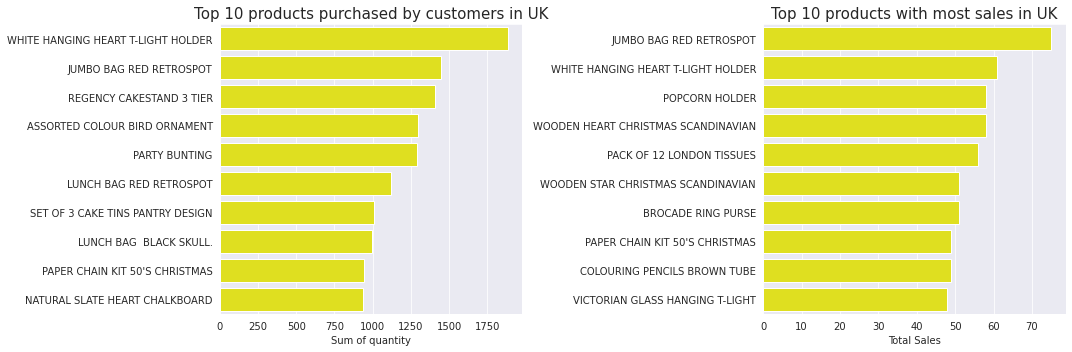

In [172]:
# 시각화 하기 
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']=='UK'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df[df['Country']=='UK'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

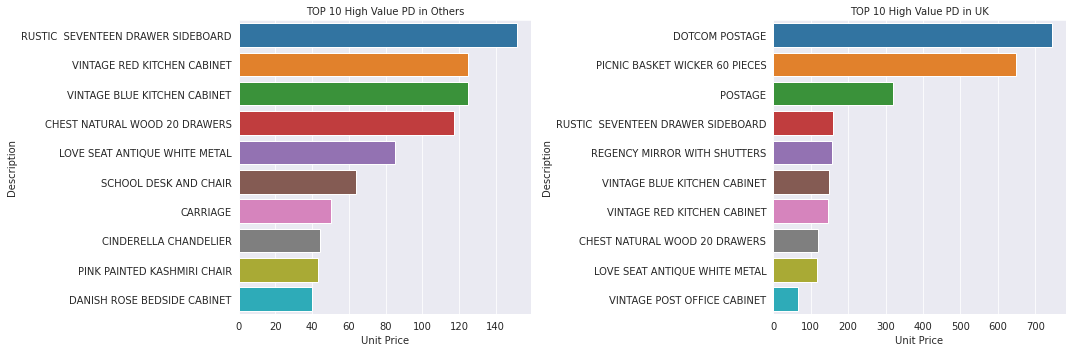

In [178]:
# 구매 물품 단가 TOP10 

columns = ['Others', 'UK']
plt.figure(figsize = (15,5))

for i, j in enumerate(columns) : 
    plt.subplot(1,2,i+1)
    sns.barplot(
        x = df[df['Country']== j].groupby('Description')['UnitPrice'].mean().sort_values(ascending = False).head(10).values, 
        y = df[df['Country']== j].groupby('Description')['UnitPrice'].mean().sort_values(ascending = False).head(10).index
    )
    
    plt.ylabel = ''
    if i == 0 : 
        plt.xlabel('Unit Price')
        plt.title('TOP 10 High Value PD in Others', size = 10)
    else : 
        plt.xlabel('Unit Price')
        plt.title('TOP 10 High Value PD in UK', size = 10)

plt.tight_layout()
plt.show()

##### Looking the distribution of column Unit Price

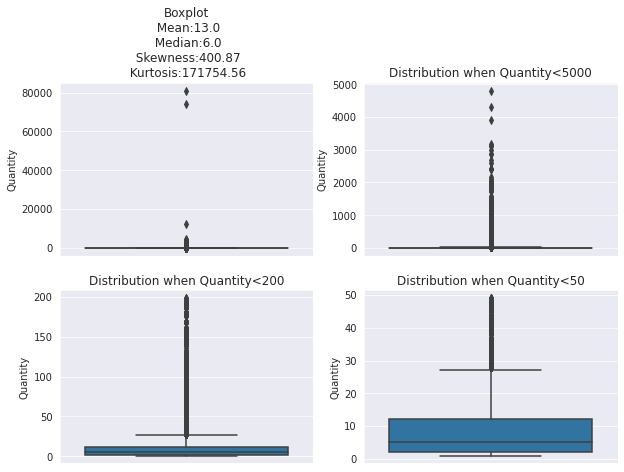

In [181]:
plt.figure(figsize = (10,7))

sk = round(df.Quantity.skew(), 2) 
kurtosis = round(df.Quantity.kurtosis(), 2)
mean = round(np.mean(df.Quantity), 0)
median = np.median(df.Quantity)

plt.subplot(2,2,1)
sns.boxplot(y = df.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,sk,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y = df[df.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

In [182]:
# 이상치 제거 
df = df[df['Quantity'] < 7000]

#### Looking the distribution of column Unit Price

Text(0.5, 1.0, 'Distribution when Unit Price<10')

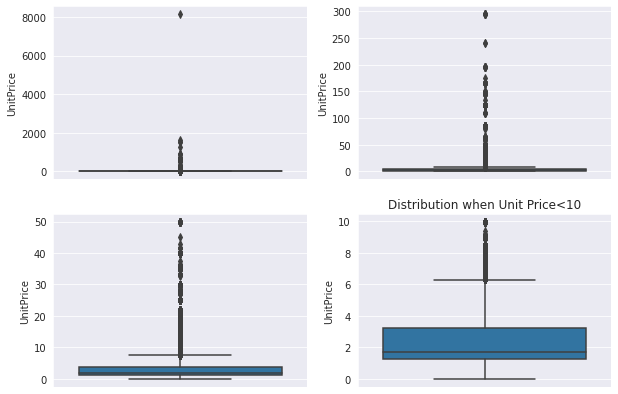

In [184]:
fig, ax = plt.subplots(2,2, figsize=(10,7))

sns.boxplot( y = df.UnitPrice, ax = ax[0,0])

sns.boxplot(y=df[df.UnitPrice<300]['UnitPrice'], ax = ax[0,1])
plt.title('Distribution when Unit Price<300')

sns.boxplot(y=df[df.UnitPrice<50]['UnitPrice'], ax = ax[1,0])
plt.title('Distribution when Unit Price<50')

sns.boxplot(y=df[df.UnitPrice<10]['UnitPrice'], ax = ax[1,1])
plt.title('Distribution when Unit Price<10')




#### Sales in each Month for an Year 

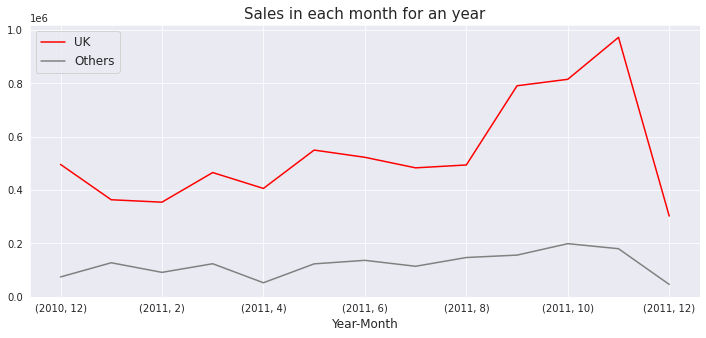

In [194]:
plt.figure(figsize = (12,5))
df[df.Country =='UK'].groupby(['year', 'month'])['Amount'].sum().plot(kind = 'line', label = 'UK', color = 'red')
df[df.Country =='Others'].groupby(['year', 'month'])['Amount'].sum().plot(kind = 'line', label = 'Others', color = 'grey')
plt.xlabel('Year-Month',size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()


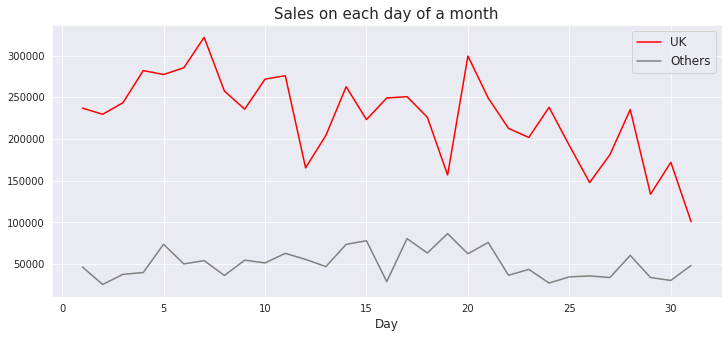

In [196]:
plt.figure(figsize = (12,5))

df[df.Country =='UK'].groupby(['day'])['Amount'].sum().plot(kind = 'line', label = 'UK', color = 'red')
df[df.Country =='Others'].groupby(['day'])['Amount'].sum().plot(kind = 'line', label = 'Others', color = 'grey')

plt.xlabel('Day', size = 12)
plt.title('Sales on each day of a month', size = 15)
plt.legend(fontsize=12)
plt.show()

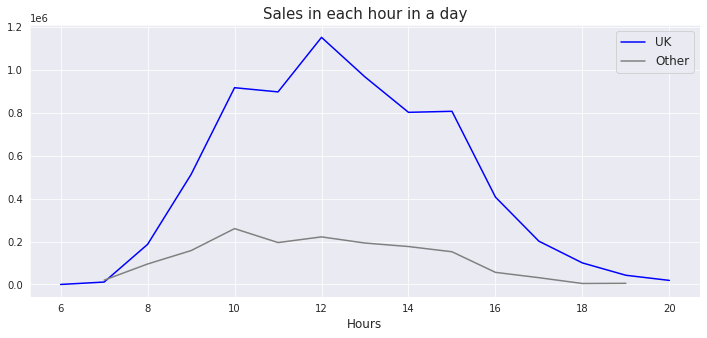

In [198]:
plt.figure(figsize=(12,5))
df[df['Country']=='UK'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

## Cohort Analysis

소비자들을 날짜를 기준으로 동일한 집단으로 묶어주는 분석 기법 

###Types of cohorts

 1. Time Cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
 2. 
Behavior cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
 3. 
Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time

In [199]:
df_cohort = df.copy()

In [200]:
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,day_of_week,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UK,2010,12,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UK,2010,12,1,8,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UK,2010,12,1,8,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UK,2010,12,1,8,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UK,2010,12,1,8,2,20.34


In [202]:
df_cohort.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'day_of_week', 'Amount'],
      dtype='object')

In [203]:
# 특정 컬럼 선택 (파생변수 X)
df_cohort = df_cohort[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount']]
df_cohort.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UK,22.00


#### Invoice Month 

In [208]:
# 'Invoice Month'  만들기 
# Year- Month 추출 

df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.strftime('%Y-%m')


# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

#### Cohort Month 

In [212]:
# Cohort Month 만들기 
# Getting the first time purchase date for each customer 
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')

#converting to Datetime
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

#### Cohort Period 

 for this we create a function which calculates the number of month between their first purchase date and Invoice date

In [214]:
def diff_month(d1,d2) : 
    return( (d1.dt.year - d2.dt.year)*12 + d1.dt.month - d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

# 식 이해하고 넘어가기 
# > 같은 연도이면 (11년 1월 , 11년 12월) 구매 - 첫구매는 양수일꺼고 
# > 해가 달라진다면 (11년 12월 , 12년 3월) 최근구매월 - 첫구매월은 음수기때문에 그 기간을 구하려면 12월에서 빼줘야함

In [215]:
df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceMonth,CohortMonth,CohortPeriod
70290,542001,21198,WHITE HEART CONFETTI IN TUBE,48,2011-01-25 10:56:00,0.42,14298.0,UK,20.16,2011-01-01,2010-12-01,1
342805,566913,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,8,2011-09-15 14:07:00,0.42,17602.0,UK,3.36,2011-09-01,2011-01-01,8
113275,545933,22291,HANGING CHICK CREAM DECORATION,24,2011-03-08 12:04:00,1.45,13908.0,UK,34.80,2011-03-01,2011-03-01,0
168225,551014,21985,PACK OF 12 HEARTS DESIGN TISSUES,24,2011-04-26 11:04:00,0.29,13209.0,UK,6.96,2011-04-01,2010-12-01,4
146288,548984,84997B,CHILDRENS CUTLERY RETROSPOT RED,2,2011-04-05 12:37:00,4.15,14546.0,UK,8.30,2011-04-01,2011-04-01,0


In [241]:
df_cohort.CohortPeriod.value_counts()

0     116772
1      27482
3      26967
2      26704
5      26661
4      25137
6      23448
7      23246
11     22995
9      22951
8      22735
10     20087
12      7165
Name: CohortPeriod, dtype: int64

In [244]:
customer_cohort = df_cohort.pivot_table(index = 'CohortMonth', 
                                        columns = 'CohortPeriod', 
                                        values = 'CustomerID', 
                                        aggfunc = 'nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,884.0,323.0,286.0,339.0,321.0,352.0,320.0,308.0,312.0,349.0,330.0,444.0,234.0
2011-01-01,415.0,91.0,111.0,96.0,132.0,120.0,103.0,100.0,124.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,109.0,103.0,94.0,97.0,104.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,67.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,187.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


고객의 retention과 acquisition을 알 수 있따 
* 각 열은 기준 날짜로, 각 열의 0column 은 "해당 날짜에 첫 구매/방문 한 손님의 수" 을 의미한다
* 각 열(1~12)은 첫 구매 이후 (한달 간격) 구매한 손님의 수를 의미. 
 * 예시  2010-12-01 의 2 column (286) 은 12월 1일에 첫 구매하고 두달 후인 2011년 2월에도 서비스를 이용 혹은 물품을 구매한 손님의 수이다. (retention) 

### Retention Table

In [274]:
cohort_size = customer_cohort.iloc[:, 0]

retention = customer_cohort.divide(cohort_size, axis = 0) # 위 df를 0컬럼의 수로 나눈것 
retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.365385,0.323529,0.383484,0.363122,0.398190,0.361991,0.348416,0.352941,0.394796,0.373303,0.502262,0.264706
2011-01-01,1.0,0.219277,0.267470,0.231325,0.318072,0.289157,0.248193,0.240964,0.298795,0.327711,0.366265,0.118072,NaN
2011-02-01,1.0,0.186842,0.186842,0.286842,0.271053,0.247368,0.255263,0.273684,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.148230,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.210000,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.091549,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.330579,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.181818,0.208556,0.224599,0.272727,0.112299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
 retention.index
 retention.index= pd.to_datetime(retention.index).date
 retention.index

Index([2010-12-01, 2011-01-01, 2011-02-01, 2011-03-01, 2011-04-01, 2011-05-01,
       2011-06-01, 2011-07-01, 2011-08-01, 2011-09-01, 2011-10-01, 2011-11-01,
       2011-12-01],
      dtype='object')

In [281]:
retention.round(3)

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,1.0,0.365,0.324,0.383,0.363,0.398,0.362,0.348,0.353,0.395,0.373,0.502,0.265
2011-01-01,1.0,0.219,0.267,0.231,0.318,0.289,0.248,0.241,0.299,0.328,0.366,0.118,NaN
2011-02-01,1.0,0.187,0.187,0.287,0.271,0.247,0.255,0.274,0.247,0.305,0.068,NaN,NaN
2011-03-01,1.0,0.148,0.252,0.199,0.223,0.168,0.268,0.230,0.279,0.086,NaN,NaN,NaN
2011-04-01,1.0,0.210,0.203,0.210,0.197,0.227,0.217,0.260,0.073,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190,0.173,0.173,0.208,0.232,0.264,0.092,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.174,0.157,0.264,0.231,0.331,0.095,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.182,0.209,0.225,0.273,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207,0.249,0.243,0.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,1.0,0.234,0.301,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


위 테이블을 통해 우리는 이탈율 및 잔존율을 확인할 수 있다.   
* 예를들어 2011년 1월기준으로 보면, 2011년 1월의 첫구매 고객들이 한달 후 약 78% 빠져나가고, 한달 후 약 5%정도의 손님이 다시 방문/구매를 한 사실을 알 수 있음 

### 재방문율 시각화

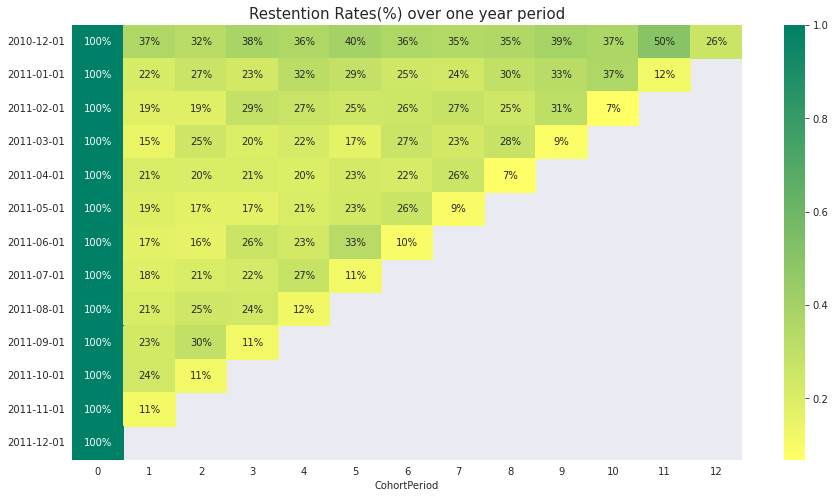

In [283]:
# 좀 더 가시적으로 확인하기 
plt.figure(figsize = (15, 8))
plt.title('Restention Rates(%) over one year period', size = 15)
sns.heatmap(data = retention, annot = True, fmt = '.0%', cmap = 'summer_r')
plt.show()

In [285]:
amount_cohort = df_cohort.pivot_table(
    index = 'CohortMonth', 
    columns = 'CohortPeriod', 
    values = 'Amount',
    aggfunc = 'mean'
).round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.23,27.28,26.87,26.90,21.16,28.14,28.29,27.40,28.99,33.44,33.73,23.56,25.8
2011-01-01,19.79,24.47,20.98,28.66,22.40,26.29,25.25,25.39,19.09,21.14,19.73,19.78,NaN
2011-02-01,18.00,20.30,20.49,19.49,17.69,16.97,22.33,22.61,18.80,22.19,23.50,NaN,NaN
2011-03-01,17.55,20.35,22.58,18.03,20.96,19.00,22.04,19.68,16.80,13.19,NaN,NaN,NaN
2011-04-01,16.89,20.85,19.50,18.74,19.55,15.00,15.25,15.97,12.34,NaN,NaN,NaN,NaN
2011-05-01,19.90,17.36,22.29,20.91,18.61,14.11,17.02,14.06,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.00,16.31,19.95,20.46,15.35,16.32,13.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.88,23.53,11.80,13.03,10.90,11.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.52,13.16,12.53,15.89,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


위 테이블을 통해 고객 세그먼트별 구매규모를 확인할 수 있다
 * 예를들어 2011년 1월 고객은 첫달에 19.79달러를 썼지만, 한달 후 24.47달러로 늘어남

###구매규모 시각화

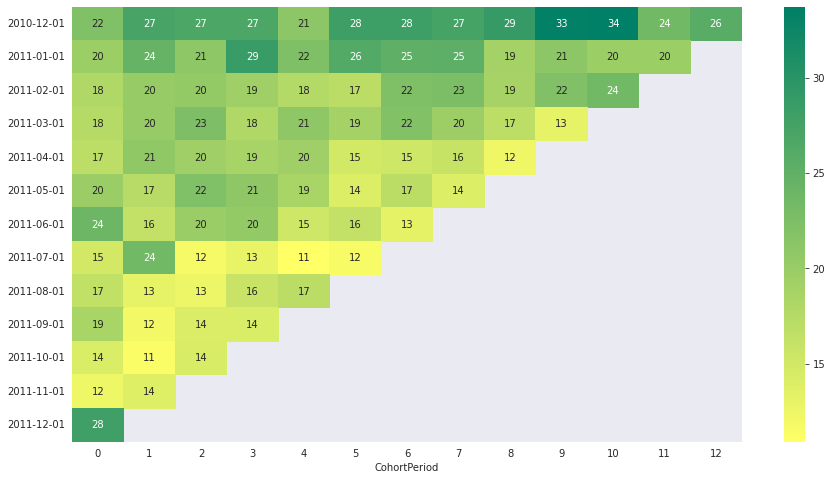

In [295]:
amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
sns.heatmap(data = amount_cohort, annot = True,  cmap = 'summer_r')

### 코호트 분석 해석 

테이블을 통해 알 수 있는점   

1. 구매규모가 늘어난 고객집단
 * 10년12월 , 11년 2월, 2011년 11월 

2. 10년 12월 고객 : retention도 좋고 구매규모도 늘어남
3. 11년 2월 : retention은 가장 저조하나 구매규모가 상위권 (인당 구매 단위가 크다는 뜻으로 해석 가능) 
4. 11년 11월 : 코호트 1을 기준으로 retention이 가장 저조하나 구매규모는 보통


분석해보기 
 * 목표 1 : 월별 소비자 집단 중 이탈이 가장 많은 집단은 ? 
  * 11년 11월이 가장 이탈율이 높음 

 * 수익성 기반 Retention을 재고해야할 집단은 ? 
  * 11년 6월 고객의 매출이 상위2위였으나, 이탈율도 3번째로 높음. 매출이 잘 나왔다하더라도, 고객들이 서비스에 남아있지 않고 이탈하여 장기적인 수익을 놓치고 있는 상황.  
* 10년 12월, 11년 1월 그리고 11년 12월 고객 (즉, 겨울 신규고객)의 구매 규모가 크고, 리텐션과 규모가 계속해서 좋음을 알 수 있음 like충성고객. 이때 손님들이 구매를 많이한 상품들을 모아 겨울에 기획전을 진행하면 효과가 클거라 예측 

## RFM Analysis

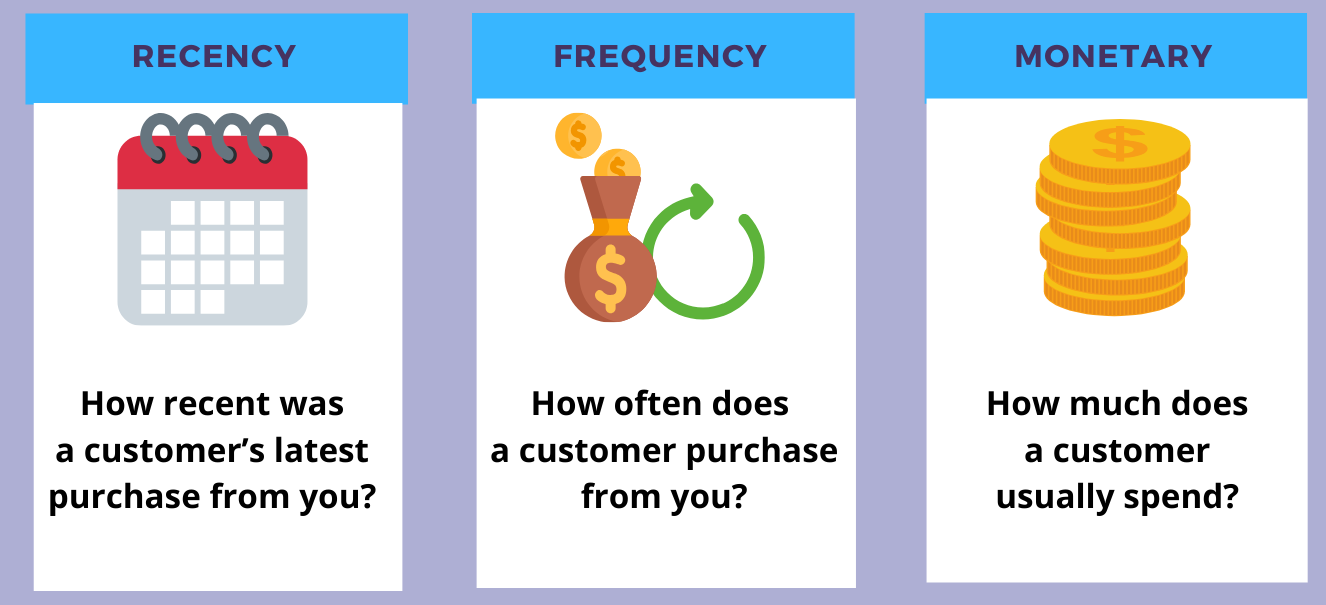

In [296]:
df_rfm = df.copy()

df_rfm = df_rfm[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount']]
df_rfm.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UK,22.00


### Recency 

In [306]:
recency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date

,CustomerID,InvoiceDate
0,12347.0,2011-12-07
1,12348.0,2011-09-25
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03
...,...,...
4328,18280.0,2011-03-07
4329,18281.0,2011-06-12
4330,18282.0,2011-12-02
4331,18283.0,2011-12-06


In [308]:
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days +1 
recency

,CustomerID,InvoiceDate,MaxDate,recency
0,12347.0,2011-12-07,2011-12-09,3
1,12348.0,2011-09-25,2011-12-09,76
2,12349.0,2011-11-21,2011-12-09,19
3,12350.0,2011-02-02,2011-12-09,311
4,12352.0,2011-11-03,2011-12-09,37
...,...,...,...,...
4328,18280.0,2011-03-07,2011-12-09,278
4329,18281.0,2011-06-12,2011-12-09,181
4330,18282.0,2011-12-02,2011-12-09,8
4331,18283.0,2011-12-06,2011-12-09,4


In [310]:
recency = recency[['CustomerID', 'recency']]
recency

,CustomerID,recency
0,12347.0,3
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,37
...,...,...
4328,18280.0,278
4329,18281.0,181
4330,18282.0,8
4331,18283.0,4


### Frequency

In [318]:
frequency = pd.DataFrame(
    df_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
)

frequency.columns = ['FCustomerID', 'Frequency']
frequency

,FCustomerID,Frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7
...,...,...
4328,18280.0,1
4329,18281.0,1
4330,18282.0,2
4331,18283.0,16


### Monetary

In [319]:
monetary = pd.DataFrame(
    df_rfm.groupby('CustomerID')['Amount'].sum().reset_index()
)

monetary.columns = ['MCustomerID', 'Monetary']
monetary.head()

,MCustomerID,Monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1665.74


### Combining

In [321]:
rfm = pd.concat([recency, frequency, monetary], axis = 1)
rfm

,CustomerID,recency,FCustomerID,Frequency,MCustomerID,Monetary
0,12347.0,3,12347.0,7,12347.0,4310.00
1,12348.0,76,12348.0,4,12348.0,1797.24
2,12349.0,19,12349.0,1,12349.0,1757.55
3,12350.0,311,12350.0,1,12350.0,334.40
4,12352.0,37,12352.0,7,12352.0,1665.74
...,...,...,...,...,...,...
4328,18280.0,278,18280.0,1,18280.0,180.60
4329,18281.0,181,18281.0,1,18281.0,80.82
4330,18282.0,8,18282.0,2,18282.0,178.05
4331,18283.0,4,18283.0,16,18283.0,2039.58


In [323]:
rfm.drop(['FCustomerID','MCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,Frequency,Monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74
5,12353.0,205,1,89.00
6,12354.0,233,1,1079.40
7,12355.0,215,1,459.40
8,12356.0,23,3,2811.43
9,12357.0,34,1,6207.67


In [324]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4333 non-null   float64
 1   recency     4333 non-null   int64  
 2   Frequency   4333 non-null   int64  
 3   Monetary    4333 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.5 KB


In [326]:
rfm.describe(percentiles = [0.25,0.5,0.75,0.9])

,CustomerID,recency,Frequency,Monetary
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,15299.933303,93.189938,4.258943,1981.708692
std,1721.608094,100.126767,7.658987,8528.128307
min,12347.000000,1.000000,1.000000,2.900000
25%,13813.000000,18.000000,1.000000,306.130000
50%,15298.000000,51.000000,2.000000,667.650000
75%,16779.000000,143.000000,5.000000,1649.500000
90%,17685.800000,264.000000,9.000000,3613.534000
max,18287.000000,374.000000,206.000000,280206.020000


### 점수화하기 

In [329]:
# RFM 값에 구간 나누기 

rfm['rscore'] = pd.cut(rfm['recency'], bins = [0, 18, 51, 143, 264, 375], labels = [5,4,3,2,1])
rfm['rscore'] = rfm['rscore'].astype('int')

rfm['fscore'] = pd.cut(rfm['Frequency'], bins = [0,1,2,5,9,210], labels = [1,2,3,4,5])
rfm['fscore'] = rfm['fscore'].astype('int')

rfm['mscore'] = pd.cut(rfm['Monetary'], bins =[0, 306,667,1649,3613,290000] , labels = [1,2,3,4,5])
rfm['mscore'] = rfm['mscore'].astype('int')

In [330]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4333 non-null   float64
 1   recency     4333 non-null   int64  
 2   Frequency   4333 non-null   int64  
 3   Monetary    4333 non-null   float64
 4   rscore      4333 non-null   int64  
 5   fscore      4333 non-null   int64  
 6   mscore      4333 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.1 KB


In [331]:
# 총 score 구하기 
def score(x) : return (x['rscore']+ x['fscore'] + x['mscore'])
rfm['score'] = rfm.apply(score, axis =1)
rfm.head(4)

,CustomerID,recency,Frequency,Monetary,rscore,fscore,mscore,score
0,12347.0,3,7,4310.00,5,4,5,14.0
1,12348.0,76,4,1797.24,3,3,4,10.0
2,12349.0,19,1,1757.55,4,1,4,9.0
3,12350.0,311,1,334.40,1,1,2,4.0


In [334]:
rfm.score.describe(percentiles = [0.25,0.5,0.75,0.9])

count    4333.000000
mean        8.414032
std         3.309840
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
max        15.000000
Name: score, dtype: float64

In [335]:
rfm['customer_type'] = pd.cut(rfm['score'], bins = [0,6,8,11,13,16], labels = ['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head()

,CustomerID,recency,Frequency,Monetary,rscore,fscore,mscore,score,customer_type
0,12347.0,3,7,4310.00,5,4,5,14.0,Platinum
1,12348.0,76,4,1797.24,3,3,4,10.0,Silver
2,12349.0,19,1,1757.55,4,1,4,9.0,Silver
3,12350.0,311,1,334.40,1,1,2,4.0,Bad
4,12352.0,37,7,1665.74,4,4,4,12.0,Gold


* 플래티넘 : 상위 10% 고객 
* 골드 : 상위 25% 
* 실버 : MAIN TARGET층 to convert to GOLD 
* 배드 : 떠나간 고객 

In [341]:
rfm.groupby('customer_type')['recency','Frequency','Monetary'].mean().round(0)


,recency,Frequency,Monetary
customer_type,,,
Bad,188.0,1.0,297.0
Bronze,78.0,2.0,622.0
Silver,44.0,4.0,1413.0
Gold,20.0,7.0,2866.0
Platinum,10.0,19.0,12111.0


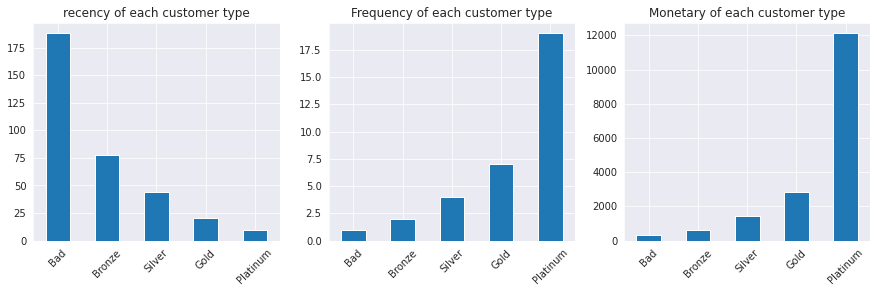

In [345]:
# 시각화하기 

columns = ['recency','Frequency','Monetary']

plt.figure(figsize = (15,4))
for i,j in enumerate(columns) : 
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind = 'bar')
    plt.title('{} of each customer type'.format(j), size = 12)
    plt.xlabel('')
    plt.xticks(rotation = 45)

plt.show()

# Clustering 

In [359]:
df_km = rfm.copy()

df_km = df_km.iloc[:, :4]
df_km.head(2)

,CustomerID,recency,Frequency,Monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24


In [360]:
df_km.shape

(4333, 4)

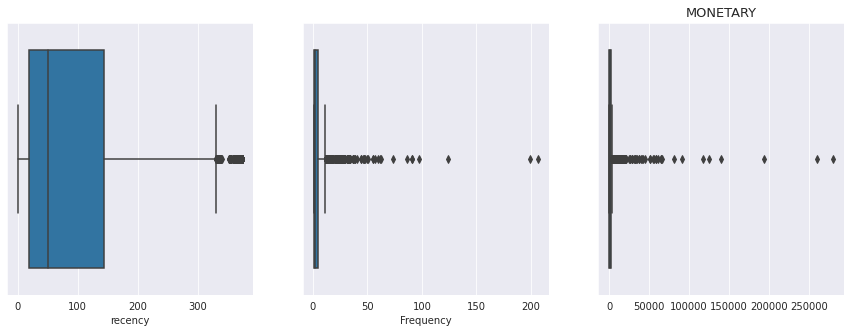

In [355]:
# 각 컬럼별 분포 확인 

columns = ['recency','Frequency','Monetary']

fig, ax = plt.subplots(1,3,figsize = (15,5))

for i, j in enumerate(columns) : 
    sns.boxplot(data = df_km, x = j, ax= ax[i])
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size = 13)
plt.show()

In [361]:
# 이상치 확인 및 제거 
columns = ['Monetary', 'recency', 'Frequency'] #수치가 큰것부터 

for c in columns : 
    q1 = df_km[c].quantile(0.05)
    q3 = df_km[c].quantile(0.95)
    iqr = q3 - q1

    df_km = df_km[(df_km[c] >= q1 - 1.5*iqr) & (df_km[c] <= q3 + 1.5*iqr)]

df_km.shape

(4258, 4)

In [362]:
# customerID 삭제 
df_km = df_km.iloc[:, 1:]

# 정규화 
sc = StandardScaler()
df_km_sc = sc.fit_transform(df_km)

# df만들기
df_km_sc = pd.DataFrame(df_km_sc, columns = df_km.columns)
df_km_sc.head()

,recency,Frequency,Monetary
0,-0.912906,0.877380,1.680360
1,-0.184668,0.098368,0.272665
2,-0.753293,-0.680645,0.250430
3,2.159660,-0.680645,-0.546845
4,-0.573727,0.877380,0.198996


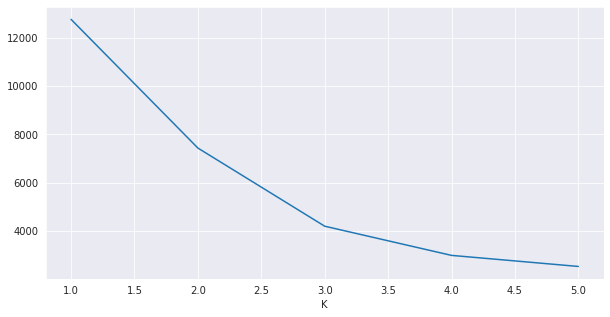

In [371]:
# 최적의 k 찾기 

km = KMeans()
distortions = []

for i in range(1,6) : 
    km = KMeans(n_clusters = i , max_iter = 50)
    km.fit(df_km_sc)
    distortions.append(km.inertia_)

#그래프 그리기 
plt.figure(figsize = (10,5))
plt.plot(np.arange(1,6,1), distortions)
plt.xlabel('K')
plt.show()

In [369]:
# 실루엣 계수 보기 

for k in list(range(2,6)) : 
    km = KMeans(n_clusters = k, max_iter = 50)
    km.fit(df_km_sc)

    labels = km.labels_

    # 실루엣 점수 
    sil_agv = silhouette_score(df_km_sc, labels)
    print('n_cluster = {0}, 실루엣 점수 = {1}'.format(k, sil_agv))

n_cluster = 2, 실루엣 점수 = 0.5460557805294505
n_cluster = 3, 실루엣 점수 = 0.5104753876147131
n_cluster = 4, 실루엣 점수 = 0.48651502202073266
n_cluster = 5, 실루엣 점수 = 0.44180283653993835


* 2나 3으로 cluster하는게 바람직해보인다 
* 실루엣계수도 2,3일때 높음 

In [373]:
km = KMeans(n_clusters = 3, max_iter = 50)
km.fit(df_km_sc)

KMeans(max_iter=50, n_clusters=3)

In [392]:
df_km['label']  = km.labels_
df_km.head(3)
df_km_sc['label'] = km.labels_

* 0번 클러스터 : Middle M, Low F and Middle R 
 * 해석 : 평균적으로 2달 전에 방문한 고객으로, 방문 빈도가 높진 않으나 구매금액이 평균 이상인 구매층. **TARGET**
* 1번 클러스터 : BEST customer 
* 2번 클러스터 : 방문도 거의 없고 잘 오지도 않고 돈도 별로 안쓰는 고객 

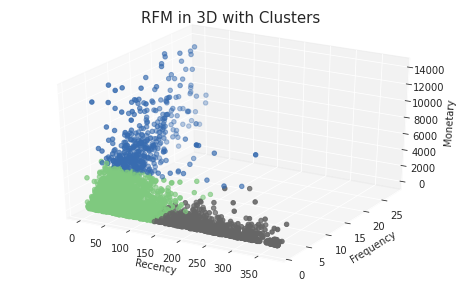

In [376]:
#시각화하기
fig = plt.figure(figsize = (8,5))
ax = plt.axes(projection = '3d')

ax.scatter3D(df_km.recency, df_km.Frequency, df_km.Monetary, c = df_km.label, cmap = 'Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

참고  :
* https://data-marketing-bk.tistory.com/entry/Python-COHORT-%EB%B6%84%EC%84%9D-%EA%B0%9C%EB%85%90%EB%B6%80%ED%84%B0-%EC%8B%A4%EC%A0%84-%EC%BD%94%EB%93%9C%EA%B9%8C%EC%A7%80-feat-%EB%B6%84%EC%84%9D-%EC%98%88%EC%A0%9C-%ED%8F%AC%ED%95%A8
* *https://data-marketing-bk.tistory.com/entry/Python-COHORT-%EB%B6%84%EC%84%9D-%EA%B0%9C%EB%85%90%EB%B6%80%ED%84%B0-%EC%8B%A4%EC%A0%84-%EC%BD%94%EB%93%9C%EA%B9%8C%EC%A7%80-feat-%EB%B6%84%EC%84%9D-%EC%98%88%EC%A0%9C-%ED%8F%AC%ED%95%A8